<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/0421_News_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
!pip install pyLDAvis

In [199]:
!pip install --upgrade mlxtend

In [196]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=a3fd59b85e8bd2d7af441057738654549ae1c1336cf1758e8f8bcefffcca7d70
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [147]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=cb5b241783727958827d5c27d5e3a7eb58555cf7ac310ef8b0e6b5cd0f18d8de
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [148]:
!pip install --upgrade mlxtend

     |████████████████████████████████| 1.3 MB 3.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 79 kB 3.2 MB/s 
     |████████████████████████████████| 4.0 MB 8.9 MB/s 
     |████████████████████████████████| 1.2 MB 38.7 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 596 kB 42.3 MB/s 
     |████████████████████████████████| 6.6 MB 33.0 MB/s 
     |████████████████████████████████| 895 kB 35.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=43372feea0c8564cde1e28d63bb228d9629c3c989bc57ac360012ef0410af96c
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer,  SentencesDataset, LoggingHandler, losses, util, InputExample, models
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
import logging
import math
import numpy as np

In [ ]:
train_batch_size = 16
num_epochs = 4
model_save_path = '/content/drive/MyDrive/프로젝트/output/kpfSBERT_nli'

In [ ]:
model = SentenceTransformer(model_save_path)

In [ ]:
model_path = model_save_path

model = SentenceTransformer(model_path)

# Corpus with example sentences
corpus = ['한 남자가 음식을 먹는다.',
          '한 남자가 빵 한 조각을 먹는다.',
          '그 여자가 아이를 돌본다.',
          '한 남자가 말을 탄다.',
          '한 여자가 바이올린을 연주한다.',
          '두 남자가 수레를 숲 속으로 밀었다.',
          '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.',
          '원숭이 한 마리가 드럼을 연주한다.',
          '치타 한 마리가 먹이 뒤에서 달리고 있다.',
          '한 남자가 파스타를 먹는다.',
          '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.',
          '치타가 들판을 가로 질러 먹이를 쫓는다.']

corpus_embeddings = model.encode(corpus)

# Then, we perform k-means clustering using sklearn:
from sklearn.cluster import KMeans

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['한 남자가 말을 탄다.', '두 남자가 수레를 숲 속으로 밀었다.', '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.']

Cluster  2
['치타 한 마리가 먹이 뒤에서 달리고 있다.', '치타가 들판을 가로 질러 먹이를 쫓는다.']

Cluster  3
['원숭이 한 마리가 드럼을 연주한다.', '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.']

Cluster  4
['한 남자가 음식을 먹는다.', '한 남자가 빵 한 조각을 먹는다.', '한 남자가 파스타를 먹는다.']

Cluster  5
['그 여자가 아이를 돌본다.', '한 여자가 바이올린을 연주한다.']



In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/프로젝트/naver_news.xlsx')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0    0
title         0
paper         0
date          0
url           0
content       0
dtype: int64

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(columns=(['index']), axis=1, inplace=True)

In [ ]:
df

title           paper         date  \
0       네이버·카카오로도 기차 예매한다…통합 교통 정보 제공(종합)            조선비즈  2021.01.31.   
1     2월부터 ‘네이버’·‘카카오T’ 앱에서 KTX 승차권 바로 예약         아시아경제신문  2021.01.31.   
2             네이버 지도, 기차예매부터 맛집 검색까지 다 된다     ZDNet Korea  2021.01.31.   
3         [시그널] 네이버, 국내외서 1조 이상 투자자금 조달한다            서울경제  2021.01.31.   
4           네이버, 벌어들인 돈보다 R&D 투자에 더 쓴다…왜?     inews24.com  2021.01.31.   
...                                   ...             ...          ...   
2242    네이버와 손잡은 LG전자, '웨일북'으로 크롬북 시장 흔들까     inews24.com  2021.03.26.   
2243                 네이버·엔씨 평균 연봉 1억원 넘었다           헤럴드경제  2021.03.17.   
2244          신세계-네이버 동맹 현실화…오후 이사회 열고 확정  financial news  2021.03.16.   
2245               네이버-신세계-CJ '反쿠팡 동맹' 떴다            매경닷컴  2021.03.16.   
2246   논란의 '네이버 뉴스' 알고리즘, 외부 위원회 구성해 따져본다            조선비즈  2021.03.17.   

                                                    url  \
0     https://news.naver.com/main/read.naver?mode=LS...   
1     https://news.naver.com/main/read.naver?mode=LS...   
2     https://news.naver.com/main/read.naver?mode=LS...   
3     https://news.naver.com/main/read.naver?mode=LS...   
4     https://news.naver.com/main/read.naver?mode=LS...   
...                                                 ...   
2242  https://news.naver.com/main/read.naver?mode=LS...   
2243  https://news.naver.com/main/read.naver?mode=LS...   
2244  https://news.naver.com/main/read.naver?mode=LS...   
2245  https://news.naver.com/main/read.naver?mode=LS...   
2246  https://news.naver.com/main/read.naver?mode=LS...   

                                                content  
0     네이버와 카카오모빌리티는 오는 1일부터 한국철도공사 기차 예매 서비스를 제공한다고 ...  
1     ‘코레일톡’ 없어도, 철도회원 가입 안해도 예약 가능…비대면 서비스 강화 한국철도는...  
2     한국철도공사 기차 운행 정보 제공...지역 정보 유용네이버는 2월1일부터 '네이버 ...  
3     회사채 발행 계획 본격화...1분기 내 1조원 넘는 현금 쥘 듯대규모 실탄 마련해 ...  
4     중소상공인 디지털 전환 앞장…지난해 매출 대비 R&D 투자 비율 25% 네이버가 지...  
...                                                 ...  
2242  이르면 하반기께 웨일북 출시…크롬북 대비 콘텐츠 등 경쟁력 확보 관건장익환 LG전자...  
2243  작년 각각 1억248만·1억550만원창업자들 연봉도 역대급 기록이해진 19억·김택진...  
2244  네이버와 이마트가 동맹을 현실화한다. 신세계그룹과 네이버는 16일 오후 각각 이사회...  
2245  3개사 잇달아 지분 맞교환이베이 입찰에 대기업 다수 참여◆ 쿠팡發 유통빅뱅 ④ ◆온...  
2246  윤영찬 더불어민주당 의원이 포털 ‘다음’ 메인에 실린 국민의힘 주호영 원내대표의 교...  

[2247 rows x 5 columns]

In [ ]:
corpus = []
for i in range(len(df)):
    sent = df['content'][i]
    corpus.append(sent)

# 3개로 Clustering

In [ ]:
model_path = model_save_path

model = SentenceTransformer(model_path)

corpus_embeddings = model.encode(corpus)

# Then, we perform k-means clustering using sklearn:
from sklearn.cluster import KMeans

num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!pip install kss

     |████████████████████████████████| 42.4 MB 1.3 MB/s 
     |████████████████████████████████| 175 kB 35.1 MB/s 
  Created wheel for kss: filename=kss-3.4.2-py3-none-any.whl size=42448069 sha256=8e65c17b17e39565329cb1d293c9601fe03734daf783faac2e775c52f606a5d1
  Stored in directory: /root/.cache/pip/wheels/ef/22/aa/6399b60516a067ec97fa6599fb2d472aeb25e3f9ee6dae3224
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=89f1433feb9178b5fcd0381d8c60b1c801a64a076e21f530065e894b17f94124
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built kss emoji


In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.6 MB/s 
     |████████████████████████████████| 448 kB 36.0 MB/s 


In [ ]:
cluster_label = clustering_model.labels_

In [ ]:
df['Cluster_label'] = cluster_label

In [ ]:
df

title           paper         date  \
0       네이버·카카오로도 기차 예매한다…통합 교통 정보 제공(종합)            조선비즈  2021.01.31.   
1     2월부터 ‘네이버’·‘카카오T’ 앱에서 KTX 승차권 바로 예약         아시아경제신문  2021.01.31.   
2             네이버 지도, 기차예매부터 맛집 검색까지 다 된다     ZDNet Korea  2021.01.31.   
3         [시그널] 네이버, 국내외서 1조 이상 투자자금 조달한다            서울경제  2021.01.31.   
4           네이버, 벌어들인 돈보다 R&D 투자에 더 쓴다…왜?     inews24.com  2021.01.31.   
...                                   ...             ...          ...   
2246    네이버와 손잡은 LG전자, '웨일북'으로 크롬북 시장 흔들까     inews24.com  2021.03.26.   
2247                 네이버·엔씨 평균 연봉 1억원 넘었다           헤럴드경제  2021.03.17.   
2248          신세계-네이버 동맹 현실화…오후 이사회 열고 확정  financial news  2021.03.16.   
2249               네이버-신세계-CJ '反쿠팡 동맹' 떴다            매경닷컴  2021.03.16.   
2250   논란의 '네이버 뉴스' 알고리즘, 외부 위원회 구성해 따져본다            조선비즈  2021.03.17.   

                                                    url  \
0     https://news.naver.com/main/read.naver?mode=LS...   
1     https://news.naver.com/main/read.naver?mode=LS...   
2     https://news.naver.com/main/read.naver?mode=LS...   
3     https://news.naver.com/main/read.naver?mode=LS...   
4     https://news.naver.com/main/read.naver?mode=LS...   
...                                                 ...   
2246  https://news.naver.com/main/read.naver?mode=LS...   
2247  https://news.naver.com/main/read.naver?mode=LS...   
2248  https://news.naver.com/main/read.naver?mode=LS...   
2249  https://news.naver.com/main/read.naver?mode=LS...   
2250  https://news.naver.com/main/read.naver?mode=LS...   

                                                content  Cluster_label  
0     네이버와 카카오모빌리티는 오는 1일부터 한국철도공사 기차 예매 서비스를 제공한다고 ...              0  
1     ‘코레일톡’ 없어도, 철도회원 가입 안해도 예약 가능…비대면 서비스 강화 한국철도는...              0  
2     한국철도공사 기차 운행 정보 제공...지역 정보 유용네이버는 2월1일부터 '네이버 ...              0  
3     회사채 발행 계획 본격화...1분기 내 1조원 넘는 현금 쥘 듯대규모 실탄 마련해 ...              2  
4     중소상공인 디지털 전환 앞장…지난해 매출 대비 R&D 투자 비율 25% 네이버가 지...              2  
...                                                 ...            ...  
2246  이르면 하반기께 웨일북 출시…크롬북 대비 콘텐츠 등 경쟁력 확보 관건장익환 LG전자...              0  
2247  작년 각각 1억248만·1억550만원창업자들 연봉도 역대급 기록이해진 19억·김택진...              2  
2248  네이버와 이마트가 동맹을 현실화한다. 신세계그룹과 네이버는 16일 오후 각각 이사회...              2  
2249  3개사 잇달아 지분 맞교환이베이 입찰에 대기업 다수 참여◆ 쿠팡發 유통빅뱅 ④ ◆온...              2  
2250  윤영찬 더불어민주당 의원이 포털 ‘다음’ 메인에 실린 국민의힘 주호영 원내대표의 교...              0  

[2251 rows x 6 columns]

In [ ]:
df.drop(columns=(['Unnamed: 0', 'Cluster_labed']), axis=1, inplace=True)

In [ ]:
data = df[['title', 'date', 'content', 'Cluster_label']]

In [ ]:
data

title         date  \
0       네이버·카카오로도 기차 예매한다…통합 교통 정보 제공(종합)  2021.01.31.   
1     2월부터 ‘네이버’·‘카카오T’ 앱에서 KTX 승차권 바로 예약  2021.01.31.   
2             네이버 지도, 기차예매부터 맛집 검색까지 다 된다  2021.01.31.   
3         [시그널] 네이버, 국내외서 1조 이상 투자자금 조달한다  2021.01.31.   
4           네이버, 벌어들인 돈보다 R&D 투자에 더 쓴다…왜?  2021.01.31.   
...                                   ...          ...   
2246    네이버와 손잡은 LG전자, '웨일북'으로 크롬북 시장 흔들까  2021.03.26.   
2247                 네이버·엔씨 평균 연봉 1억원 넘었다  2021.03.17.   
2248          신세계-네이버 동맹 현실화…오후 이사회 열고 확정  2021.03.16.   
2249               네이버-신세계-CJ '反쿠팡 동맹' 떴다  2021.03.16.   
2250   논란의 '네이버 뉴스' 알고리즘, 외부 위원회 구성해 따져본다  2021.03.17.   

                                                content  Cluster_label  
0     네이버와 카카오모빌리티는 오는 1일부터 한국철도공사 기차 예매 서비스를 제공한다고 ...              0  
1     ‘코레일톡’ 없어도, 철도회원 가입 안해도 예약 가능…비대면 서비스 강화 한국철도는...              0  
2     한국철도공사 기차 운행 정보 제공...지역 정보 유용네이버는 2월1일부터 '네이버 ...              0  
3     회사채 발행 계획 본격화...1분기 내 1조원 넘는 현금 쥘 듯대규모 실탄 마련해 ...              2  
4     중소상공인 디지털 전환 앞장…지난해 매출 대비 R&D 투자 비율 25% 네이버가 지...              2  
...                                                 ...            ...  
2246  이르면 하반기께 웨일북 출시…크롬북 대비 콘텐츠 등 경쟁력 확보 관건장익환 LG전자...              0  
2247  작년 각각 1억248만·1억550만원창업자들 연봉도 역대급 기록이해진 19억·김택진...              2  
2248  네이버와 이마트가 동맹을 현실화한다. 신세계그룹과 네이버는 16일 오후 각각 이사회...              2  
2249  3개사 잇달아 지분 맞교환이베이 입찰에 대기업 다수 참여◆ 쿠팡發 유통빅뱅 ④ ◆온...              2  
2250  윤영찬 더불어민주당 의원이 포털 ‘다음’ 메인에 실린 국민의힘 주호영 원내대표의 교...              0  

[2251 rows x 4 columns]

In [ ]:
test_df = data[['content', 'Cluster_label']]

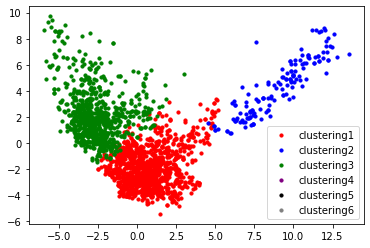

In [ ]:
#pca(주성분 분석)으로 시각화하기
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2) # 2차원으로 축소
pc = pca.fit_transform(corpus_embeddings)
p_df = pd.DataFrame(data=pc, columns=['main1', 'main2'])
p_df.index=data['Cluster_label']

plt.scatter(p_df.iloc[clustering_model.labels_ == 0,0],
            p_df.iloc[clustering_model.labels_ == 0,1], s = 10, c = 'red', label = 'clustering1')
plt.scatter(p_df.iloc[clustering_model.labels_ == 1,0],
            p_df.iloc[clustering_model.labels_ == 1,1], s = 10, c = 'blue', label = 'clustering2')
plt.scatter(p_df.iloc[clustering_model.labels_ == 2,0],
            p_df.iloc[clustering_model.labels_ == 2,1], s = 10, c = 'green', label = 'clustering3')
plt.scatter(p_df.iloc[clustering_model.labels_ == 3,0],
            p_df.iloc[clustering_model.labels_ == 3,1], s = 10, c = 'purple', label = 'clustering4')
plt.scatter(p_df.iloc[clustering_model.labels_ == 4,0],
            p_df.iloc[clustering_model.labels_ == 4,1], s = 10, c = 'black', label = 'clustering5')
plt.scatter(p_df.iloc[clustering_model.labels_ == 5,0],
            p_df.iloc[clustering_model.labels_ == 5,1], s = 10, c = 'grey', label = 'clustering6')

plt.legend()
plt.show()

# 2개로 Clustering

In [ ]:
model_path = model_save_path

model = SentenceTransformer(model_path)

corpus_embeddings = model.encode(corpus)

num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
cluster_label = clustering_model.labels_

In [ ]:
df['Cluster_label'] = cluster_label

In [ ]:
data = df[['title', 'date', 'content', 'Cluster_label']]

In [ ]:
data

title         date  \
0       네이버·카카오로도 기차 예매한다…통합 교통 정보 제공(종합)  2021.01.31.   
1     2월부터 ‘네이버’·‘카카오T’ 앱에서 KTX 승차권 바로 예약  2021.01.31.   
2             네이버 지도, 기차예매부터 맛집 검색까지 다 된다  2021.01.31.   
3         [시그널] 네이버, 국내외서 1조 이상 투자자금 조달한다  2021.01.31.   
4           네이버, 벌어들인 돈보다 R&D 투자에 더 쓴다…왜?  2021.01.31.   
...                                   ...          ...   
2242    네이버와 손잡은 LG전자, '웨일북'으로 크롬북 시장 흔들까  2021.03.26.   
2243                 네이버·엔씨 평균 연봉 1억원 넘었다  2021.03.17.   
2244          신세계-네이버 동맹 현실화…오후 이사회 열고 확정  2021.03.16.   
2245               네이버-신세계-CJ '反쿠팡 동맹' 떴다  2021.03.16.   
2246   논란의 '네이버 뉴스' 알고리즘, 외부 위원회 구성해 따져본다  2021.03.17.   

                                                content  Cluster_label  
0     네이버와 카카오모빌리티는 오는 1일부터 한국철도공사 기차 예매 서비스를 제공한다고 ...              1  
1     ‘코레일톡’ 없어도, 철도회원 가입 안해도 예약 가능…비대면 서비스 강화 한국철도는...              1  
2     한국철도공사 기차 운행 정보 제공...지역 정보 유용네이버는 2월1일부터 '네이버 ...              1  
3     회사채 발행 계획 본격화...1분기 내 1조원 넘는 현금 쥘 듯대규모 실탄 마련해 ...              1  
4     중소상공인 디지털 전환 앞장…지난해 매출 대비 R&D 투자 비율 25% 네이버가 지...              1  
...                                                 ...            ...  
2242  이르면 하반기께 웨일북 출시…크롬북 대비 콘텐츠 등 경쟁력 확보 관건장익환 LG전자...              1  
2243  작년 각각 1억248만·1억550만원창업자들 연봉도 역대급 기록이해진 19억·김택진...              1  
2244  네이버와 이마트가 동맹을 현실화한다. 신세계그룹과 네이버는 16일 오후 각각 이사회...              1  
2245  3개사 잇달아 지분 맞교환이베이 입찰에 대기업 다수 참여◆ 쿠팡發 유통빅뱅 ④ ◆온...              1  
2246  윤영찬 더불어민주당 의원이 포털 ‘다음’ 메인에 실린 국민의힘 주호영 원내대표의 교...              1  

[2247 rows x 4 columns]

In [ ]:
tmp_df = data[['content', 'Cluster_label']]

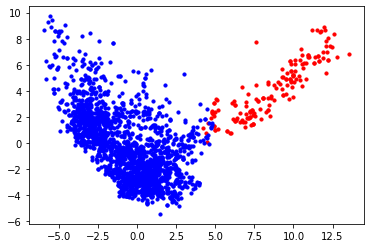

In [ ]:
#pca(주성분 분석)으로 시각화하기
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2) # 2차원으로 축소
pc = pca.fit_transform(corpus_embeddings)
p_df = pd.DataFrame(data=pc, columns=['main1', 'main2'])
p_df.index=data['Cluster_label']

plt.scatter(p_df.iloc[clustering_model.labels_ == 0,0],
            p_df.iloc[clustering_model.labels_ == 0,1], s = 10, c = 'red', label = 'clustering1')
plt.scatter(p_df.iloc[clustering_model.labels_ == 1,0],
            p_df.iloc[clustering_model.labels_ == 1,1], s = 10, c = 'blue', label = 'clustering2')

In [ ]:
clustered_sentences[0]

["16년간 운영돼 온 네이버 '실시간 급상승 검색어' 서비스가 종료됐다. 오랜 기간 이용자의 정보 접근성 제고에 큰 역할을 했지만, 정치적·상업적 용도로 악용되고 있다는 우려가 끊이지 않았기 때문이다.   25일 네이버에 따르면 지난 2005년 5월 첫 선을 보인 네이버 급상승 검색어 서비스가 이날부터 종료된다. PC 버전에서 기존 실검 자리는 날씨 정보로 대체됐다.   이번 폐지로 국내 양대 포털 모두에서 실검 서비스는 사라지게 됐다. 포털 업계 2위인 카카오의 ‘다음’도 지난해 2월 실시간 검색어를 폐지한 바 있다.   그러나 완전한 폐지는 아니다. 검색업계 4위와 5위인 네이트와 줌은 아직 실시간 검색어를 운영하고 있다. 실검의 필요성을 느끼는 일부 이용자들의 수요가 이들로 이동할 가능성도 높다.           #네이버 #실검 #fn그래pic #네이트    박희진 기자",
 '네이버 모바일 버전 경제지표 안내 서비스. 네이버 실시간 급상승 검색어 서비스가 16년 만에 종료됐다. 네이버는 25일 0시부터 포털 메인 화면에 띄우던 \'급상승 검색어\' 서비스를 중단한다고 밝혔다. 이와 함께 뉴스를 토픽 단위로 묶어 제공하던 \'뉴스토픽\'도 사라졌다.네이버는 "이용자들의 검색 니즈가 다양화됨에 따라 실검 서비스를 종료한다"며 "직접 매체를 선택하고 다양한 뉴스를 추천받는 소비 트렌드에 맞춰 뉴스토픽도 종료하게 됐다"고 밝혔다.이날 네이버 PC 버전에서 실검이 있던 자리는 날씨 정보로 대체됐다. 모바일 버전의 검색차트 판에서는 주가와 유가, 환율 등을 확인할 수 있도록 했다.그동안 실검 서비스는 여론 조작 논란에 시달려왔다. 이용자들이 특정 검색어를 순간적으로 많이 검색하면 순위에 오르고, 동시에 화제가 됐기 때문이다.앞서 경쟁사인 카카오도 지난해 2월부터 실검 서비스를 종료한 바 있다. 사생활 보호를 위해 인물 검색 시 함께 나타나던 연관 검색어 서비스도 중단했다.',
 "16년간 운영돼 온 네이버 '실시간 급상승 검색어' 서비스가 종료됐다. 오랜 기간

In [ ]:
clustered_sentences[1]

['네이버와 카카오모빌리티는 오는 1일부터 한국철도공사 기차 예매 서비스를 제공한다고 31일 밝혔다. /네이버네이버는 네이버지도 애플리케이션과 네이버 검색을 통해 기차 운행 정보를 확인하고 예매까지 할 수 있다고 소개했다. 네이버지도 앱에 신설된 ‘기차 조회/예매’ 탭을 누르거나 네이버 검색 창에 역사 이름 또는 ‘기차 시간표’, ‘기차 예매’ 등의 키워드를 검색하면 된다. 명절 연휴 사전예매를 제외한 KTX, 새마을, 무궁화, ITX-청춘, 관광열차 등의 정보가 제공된다.네이버는 이용자가 목적지까지 경로를 탐색하는 과정에서 네이버 지도만으로도 기차 예매가 가능해진 만큼 앞으로 보다 완결성 있는 검색 경험을 제공하게 됐다고 설명했다. 네이버 측은 "기차는 전국적으로 다양한 노선과 환승 구간이 존재한다"며 "시간과 비용에서 경제적인 경로를 쉽게 파악하고 예매까지 가능한 원스톱 기능에 대한 이용자 니즈가 많다"고 했다.또 네이버는 ‘스마트플레이스’에 등록된 SME 등 다양한 지역 사업자와의 시너지 효과를 기대하고 있다. 예컨대 부산 여행 계획을 짤 때 네이버 지도에 탑재된 정보를 활용해 이용자 취향의 음식점을 찾아보면서 부산행 기차 예매까지 한 번에 가능해지는 것이다. 혹은 출발 당일 탑승 시간에 앞서 ‘네이버 스마트주문’으로 서울역 근처 식당의 음식을 미리 주문하고 픽업해 기차에 탑승할 수도 있다.네이버 지도를 담당하는 우승기 책임리더는 "네이버 지도는 출발지와 목적지 사이에서 도보 경로, 대중교통 길 찾기 기능에 더해 기차 정보/예매 기능으로 완결성 있는 이동 경험을 제공할 수 있게 됐다"며 "향후 도착 시간에 맞춰 도착지 근처의 맛집을 알림으로 추천해주는 등 이용자 편의를 위한 다양한 기능을 검토하고 있다"고 했다. /카카오모빌리티카카오모빌리티도 ‘카카오 T 기차’를 통해 코레일 기차의 예매와 발권 서비스를 제공한다. 마찬가지로 명절 연휴 사전예매를 제외한 한국철도에서 운영하는 모든 종류의 일반 열차가 해당된다. 카카오 T 기차는 카카오 T 앱 가입자라면 누

In [ ]:
!pip install soynlp

     |████████████████████████████████| 416 kB 5.3 MB/s 


In [ ]:
from soynlp.noun import NewsNounExtractor

noun_extractor_news = NewsNounExtractor(
    max_left_length=10, 
    max_right_length=7,
    predictor_fnames=None,
    verbose=True
)
nouns_news = noun_extractor_news.train_extract(article)


used default noun predictor; Sejong corpus based logistic predictor
/usr/local/lib/python3.7/dist-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (1467, 0, 1467)
predicting noun score was done                                        
before postprocessing 0
_noun_scores_ 0
checking hardrules ... done
after postprocessing 0
extracted 0 compounds from eojeols

In [ ]:
article = ','.join(sents)

In [ ]:
sents = []
for i in range(len(clustered_sentences[1])):
    if clustered_sentences[1][i] != 'nan':
        sents.append(clustered_sentences[1][i])

In [ ]:
sents[1205]

'네이버와 카카오의 뉴스 제휴 심사를 담당하는 ‘네이버·카카오 뉴스제휴평가위원회 심의위원회’가\xa0뉴스 제휴・제재 심사 규정을 손질한다. 로봇이 쓴 기사가 보여지는 영역을 기존보다 확대하고, 벌점이 누적돼도 연단위로 삭제된다는 점을 악용하는 매체들을 제재하기 위해 이전에 벌점이 높았던 매체는 제휴 재검토를 진행하는 방안 등을 내놨다.24일 심의위원회는 이달\xa019일과 23일 뉴스 제휴 및 제재 심사를 포함한 전원회의를 열고\xa0뉴스 제휴・제재 심사 규정을 이같이 개정하기로 의결했다고 밝혔다.\xa0변경된 규정은 3월1일부터 적용된다.개정된 내용 들여다 보니심의위원회는 뉴스제휴 및 제재 전반에 대한 문제점을 파악하고 개선하기 위해 2020년 7월부터 총 5개의TF를 구성해 논의를 진행했다. 이번 개정에는 7개월 간 나온 의견이 반영됐다.먼저 자동생성기사 TF는 자동생성기사의 폐해를 막고, 인공지능 저널리즘의 실험을 막지 않는 방법을 고민했다. 사람의 상당한 노력이 더해진 자동생성기사의 경우 하루에 10건에 대해서는 별도로 마련된 자동생성기사 카테고리가 아닌 섹션으로도 전송할 수 있게 한다는 결론을 내렸다.\xa0지역 매체 입점 혜택 TF는 지역 매체 입점에 관해 논의했던 기존 가점안보다 실효성이 있는 안을 제안해 주기를 원하는 포털사의 요청을 받아들여, 이를 재논의하는 TF를 구성하기로 했다.기제휴 매체 저널리즘 품질평가 TF는 누적 벌점의 연단위 삭제 악용 방지를 위해 매년 3월1일을 기준으로 과거 2기의 누적벌점 계산기간 동안 부여 받은 벌점의 합계가 8점 이상인 경우, 해당 매체에 대해 재평가를 진행하기로 했다.\xa0또 매체 단위 평가를 악용하는 사례를 방지하기 위해 ▲최초 제휴 계약 당시의 제휴 기준과 현재의 제휴 기준 사이에 현저한 변경이 있거나 또는 ▲제휴 내용이나 매체의 성격에 변경이 있는 경우, ▲‘제1소위’가 재평가 대상 ‘제휴매체’로 의결했을 때 재평가를 진행한다. 이와 더불어 자체기사의 세부 정의를 일부 변경하여 규정을 개정할 예정이

In [119]:
from soynlp.noun import NewsNounExtractor
noun_extractor = NewsNounExtractor()
nouns = noun_extractor.train_extract(sents) # list of str like

used default noun predictor; Sejong corpus based logistic predictor
/usr/local/lib/python3.7/dist-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (151043, 89571, 73090)
predicting noun score was done                                        
before postprocessing 49000
_noun_scores_ 9200
checking hardrules ... done
after postprocessing 6019
extracted 296 compounds from eojeols

In [123]:
nouns

{'해당된다.': NewsNounScore(score=0, frequency=4, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '있다.카카오톡': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '연결기준': NewsNounScore(score=0, frequency=26, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '투자해왔다.': NewsNounScore(score=0, frequency=4, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '민간인증서': NewsNounScore(score=0, frequency=4, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '불편했다.': NewsNounScore(score=0, frequency=4, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '학습했다.': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion

In [121]:
sort_nouns_news = sorted(nouns.items(), key=lambda x:-x[1].score)[:200]
print(sort_nouns_news)

[('스마트', NewsNounScore(score=1.0, frequency=1067, feature_proportion=0.006289308176100629, eojeol_proportion=0.10590440487347703, n_positive_feature=1, unique_positive_feature_proportion=1.0)), ('‘코', NewsNounScore(score=1.0, frequency=42, feature_proportion=0.09523809523809523, eojeol_proportion=0.0, n_positive_feature=1, unique_positive_feature_proportion=1.0)), ('내달', NewsNounScore(score=1.0, frequency=68, feature_proportion=0.875, eojeol_proportion=0.8823529411764706, n_positive_feature=2, unique_positive_feature_proportion=1.0)), ('2월1일', NewsNounScore(score=1.0, frequency=3, feature_proportion=1.0, eojeol_proportion=0.3333333333333333, n_positive_feature=1, unique_positive_feature_proportion=1.0)), ('이에', NewsNounScore(score=1.0, frequency=256, feature_proportion=0.125, eojeol_proportion=0.96875, n_positive_feature=1, unique_positive_feature_proportion=1.0)), ('카카오T', NewsNounScore(score=1.0, frequency=17, feature_proportion=0.07142857142857142, eojeol_proportion=0.17647058823529

# konlpy 형태소분석

In [124]:
from konlpy.tag import Okt
import kss

In [126]:
t_df = data.loc[data['Cluster_label'] == 1] 

In [128]:
t_df.reset_index(inplace=True)

In [129]:
t_df.drop(columns='index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [130]:
t_df

title         date  \
0       네이버·카카오로도 기차 예매한다…통합 교통 정보 제공(종합)  2021.01.31.   
1     2월부터 ‘네이버’·‘카카오T’ 앱에서 KTX 승차권 바로 예약  2021.01.31.   
2             네이버 지도, 기차예매부터 맛집 검색까지 다 된다  2021.01.31.   
3         [시그널] 네이버, 국내외서 1조 이상 투자자금 조달한다  2021.01.31.   
4           네이버, 벌어들인 돈보다 R&D 투자에 더 쓴다…왜?  2021.01.31.   
...                                   ...          ...   
2079    네이버와 손잡은 LG전자, '웨일북'으로 크롬북 시장 흔들까  2021.03.26.   
2080                 네이버·엔씨 평균 연봉 1억원 넘었다  2021.03.17.   
2081          신세계-네이버 동맹 현실화…오후 이사회 열고 확정  2021.03.16.   
2082               네이버-신세계-CJ '反쿠팡 동맹' 떴다  2021.03.16.   
2083   논란의 '네이버 뉴스' 알고리즘, 외부 위원회 구성해 따져본다  2021.03.17.   

                                                content  Cluster_label  
0     네이버와 카카오모빌리티는 오는 1일부터 한국철도공사 기차 예매 서비스를 제공한다고 ...              1  
1     ‘코레일톡’ 없어도, 철도회원 가입 안해도 예약 가능…비대면 서비스 강화 한국철도는...              1  
2     한국철도공사 기차 운행 정보 제공...지역 정보 유용네이버는 2월1일부터 '네이버 ...              1  
3     회사채 발행 계획 본격화...1분기 내 1조원 넘는 현금 쥘 듯대규모 실탄 마련해 ...              1  
4     중소상공인 디지털 전환 앞장…지난해 매출 대비 R&D 투자 비율 25% 네이버가 지...              1  
...                                                 ...            ...  
2079  이르면 하반기께 웨일북 출시…크롬북 대비 콘텐츠 등 경쟁력 확보 관건장익환 LG전자...              1  
2080  작년 각각 1억248만·1억550만원창업자들 연봉도 역대급 기록이해진 19억·김택진...              1  
2081  네이버와 이마트가 동맹을 현실화한다. 신세계그룹과 네이버는 16일 오후 각각 이사회...              1  
2082  3개사 잇달아 지분 맞교환이베이 입찰에 대기업 다수 참여◆ 쿠팡發 유통빅뱅 ④ ◆온...              1  
2083  윤영찬 더불어민주당 의원이 포털 ‘다음’ 메인에 실린 국민의힘 주호영 원내대표의 교...              1  

[2084 rows x 4 columns]

In [131]:
# 데이터 저장
t_df.to_excel('/content/drive/MyDrive/프로젝트/naver_clustered_news.xlsx', index=False)

In [134]:
okt = Okt()

news_nouns = t_df['content'].apply(okt.nouns)

In [136]:
t_df['Nouns'] = news_nouns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
t_df

title         date  \
0       네이버·카카오로도 기차 예매한다…통합 교통 정보 제공(종합)  2021.01.31.   
1     2월부터 ‘네이버’·‘카카오T’ 앱에서 KTX 승차권 바로 예약  2021.01.31.   
2             네이버 지도, 기차예매부터 맛집 검색까지 다 된다  2021.01.31.   
3         [시그널] 네이버, 국내외서 1조 이상 투자자금 조달한다  2021.01.31.   
4           네이버, 벌어들인 돈보다 R&D 투자에 더 쓴다…왜?  2021.01.31.   
...                                   ...          ...   
2079    네이버와 손잡은 LG전자, '웨일북'으로 크롬북 시장 흔들까  2021.03.26.   
2080                 네이버·엔씨 평균 연봉 1억원 넘었다  2021.03.17.   
2081          신세계-네이버 동맹 현실화…오후 이사회 열고 확정  2021.03.16.   
2082               네이버-신세계-CJ '反쿠팡 동맹' 떴다  2021.03.16.   
2083   논란의 '네이버 뉴스' 알고리즘, 외부 위원회 구성해 따져본다  2021.03.17.   

                                                content  Cluster_label  \
0     네이버와 카카오모빌리티는 오는 1일부터 한국철도공사 기차 예매 서비스를 제공한다고 ...              1   
1     ‘코레일톡’ 없어도, 철도회원 가입 안해도 예약 가능…비대면 서비스 강화 한국철도는...              1   
2     한국철도공사 기차 운행 정보 제공...지역 정보 유용네이버는 2월1일부터 '네이버 ...              1   
3     회사채 발행 계획 본격화...1분기 내 1조원 넘는 현금 쥘 듯대규모 실탄 마련해 ...              1   
4     중소상공인 디지털 전환 앞장…지난해 매출 대비 R&D 투자 비율 25% 네이버가 지...              1   
...                                                 ...            ...   
2079  이르면 하반기께 웨일북 출시…크롬북 대비 콘텐츠 등 경쟁력 확보 관건장익환 LG전자...              1   
2080  작년 각각 1억248만·1억550만원창업자들 연봉도 역대급 기록이해진 19억·김택진...              1   
2081  네이버와 이마트가 동맹을 현실화한다. 신세계그룹과 네이버는 16일 오후 각각 이사회...              1   
2082  3개사 잇달아 지분 맞교환이베이 입찰에 대기업 다수 참여◆ 쿠팡發 유통빅뱅 ④ ◆온...              1   
2083  윤영찬 더불어민주당 의원이 포털 ‘다음’ 메인에 실린 국민의힘 주호영 원내대표의 교...              1   

                                                  Nouns  
0     [네이버, 카카오, 모빌리티, 한국, 철도공사, 기차, 예매, 서비스, 제공, 고,...  
1     [코레일, 톡, 철도, 회원, 가입, 안해, 예약, 가능, 비대, 서비스, 강화, ...  
2     [한국, 철도공사, 기차, 운행, 정보, 제공, 지역, 정보, 유용, 네이버, 네이...  
3     [회사채, 발행, 계획, 본격, 내, 현금, 듯, 대규모, 실탄, 마련, 글로벌, ...  
4     [중소, 공인, 디지털, 전환, 앞장, 지난해, 매출, 대비, 투자, 비율, 네이버...  
...                                                 ...  
2079  [하반기, 웨일, 북, 출시, 크롬북, 대비, 콘텐츠, 등, 경쟁력, 확보, 관건,...  
2080  [작년, 각각, 연봉, 역대, 기록, 이해진, 김택진, 비교, 각, 네이버, 창업,...  
2081  [네이버, 이마트, 동맹, 현실, 신세계, 그룹, 네이버, 오후, 각각, 이사회, ...  
2082  [개사, 달, 분, 교환, 이베이, 입찰, 대기업, 다수, 참여, 쿠팡, 유통, 빅...  
2083  [윤영, 찬, 민주당, 의원, 포털, 다음, 메인, 국민, 힘, 주호영, 원내대표,...  

[2084 rows x 5 columns]

In [161]:
stop_words = ['카카오','가','이','을','는','한','머니투데이','분','달','찬','각','각각','북','웨일','한국경제','매일경제','한경','매경','내',
              '듯','톡','고','네이버','수','등','것']

In [164]:
t_df['Nouns_'] = ''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [165]:
for i in range(len(t_df)):
    words = []
    for j in range(len(t_df['Nouns'][i])):
        if t_df['Nouns'][i][j] not in stop_words:
            words.append(t_df['Nouns'][i][j])
    t_df['Nouns_'][i] = words

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
t_df

title         date  \
0       네이버·카카오로도 기차 예매한다…통합 교통 정보 제공(종합)  2021.01.31.   
1     2월부터 ‘네이버’·‘카카오T’ 앱에서 KTX 승차권 바로 예약  2021.01.31.   
2             네이버 지도, 기차예매부터 맛집 검색까지 다 된다  2021.01.31.   
3         [시그널] 네이버, 국내외서 1조 이상 투자자금 조달한다  2021.01.31.   
4           네이버, 벌어들인 돈보다 R&D 투자에 더 쓴다…왜?  2021.01.31.   
...                                   ...          ...   
2079    네이버와 손잡은 LG전자, '웨일북'으로 크롬북 시장 흔들까  2021.03.26.   
2080                 네이버·엔씨 평균 연봉 1억원 넘었다  2021.03.17.   
2081          신세계-네이버 동맹 현실화…오후 이사회 열고 확정  2021.03.16.   
2082               네이버-신세계-CJ '反쿠팡 동맹' 떴다  2021.03.16.   
2083   논란의 '네이버 뉴스' 알고리즘, 외부 위원회 구성해 따져본다  2021.03.17.   

                                                content  Cluster_label  \
0     네이버와 카카오모빌리티는 오는 1일부터 한국철도공사 기차 예매 서비스를 제공한다고 ...              1   
1     ‘코레일톡’ 없어도, 철도회원 가입 안해도 예약 가능…비대면 서비스 강화 한국철도는...              1   
2     한국철도공사 기차 운행 정보 제공...지역 정보 유용네이버는 2월1일부터 '네이버 ...              1   
3     회사채 발행 계획 본격화...1분기 내 1조원 넘는 현금 쥘 듯대규모 실탄 마련해 ...              1   
4     중소상공인 디지털 전환 앞장…지난해 매출 대비 R&D 투자 비율 25% 네이버가 지...              1   
...                                                 ...            ...   
2079  이르면 하반기께 웨일북 출시…크롬북 대비 콘텐츠 등 경쟁력 확보 관건장익환 LG전자...              1   
2080  작년 각각 1억248만·1억550만원창업자들 연봉도 역대급 기록이해진 19억·김택진...              1   
2081  네이버와 이마트가 동맹을 현실화한다. 신세계그룹과 네이버는 16일 오후 각각 이사회...              1   
2082  3개사 잇달아 지분 맞교환이베이 입찰에 대기업 다수 참여◆ 쿠팡發 유통빅뱅 ④ ◆온...              1   
2083  윤영찬 더불어민주당 의원이 포털 ‘다음’ 메인에 실린 국민의힘 주호영 원내대표의 교...              1   

                                                  Nouns  \
0     [네이버, 카카오, 모빌리티, 한국, 철도공사, 기차, 예매, 서비스, 제공, 고,...   
1     [코레일, 톡, 철도, 회원, 가입, 안해, 예약, 가능, 비대, 서비스, 강화, ...   
2     [한국, 철도공사, 기차, 운행, 정보, 제공, 지역, 정보, 유용, 네이버, 네이...   
3     [회사채, 발행, 계획, 본격, 내, 현금, 듯, 대규모, 실탄, 마련, 글로벌, ...   
4     [중소, 공인, 디지털, 전환, 앞장, 지난해, 매출, 대비, 투자, 비율, 네이버...   
...                                                 ...   
2079  [하반기, 웨일, 북, 출시, 크롬북, 대비, 콘텐츠, 등, 경쟁력, 확보, 관건,...   
2080  [작년, 각각, 연봉, 역대, 기록, 이해진, 김택진, 비교, 각, 네이버, 창업,...   
2081  [네이버, 이마트, 동맹, 현실, 신세계, 그룹, 네이버, 오후, 각각, 이사회, ...   
2082  [개사, 달, 분, 교환, 이베이, 입찰, 대기업, 다수, 참여, 쿠팡, 유통, 빅...   
2083  [윤영, 찬, 민주당, 의원, 포털, 다음, 메인, 국민, 힘, 주호영, 원내대표,...   

                                                 Nouns_  
0     [모빌리티, 한국, 철도공사, 기차, 예매, 서비스, 제공, 지도, 애플리케이션, ...  
1     [코레일, 철도, 회원, 가입, 안해, 예약, 가능, 비대, 서비스, 강화, 한국,...  
2     [한국, 철도공사, 기차, 운행, 정보, 제공, 지역, 정보, 유용, 지도, 앱, ...  
3     [회사채, 발행, 계획, 본격, 현금, 대규모, 실탄, 마련, 글로벌, 시장, 정,...  
4     [중소, 공인, 디지털, 전환, 앞장, 지난해, 매출, 대비, 투자, 비율, 지난해...  
...                                                 ...  
2079  [하반기, 출시, 크롬북, 대비, 콘텐츠, 경쟁력, 확보, 관건, 장익, 환, 전자...  
2080  [작년, 연봉, 역대, 기록, 이해진, 김택진, 비교, 창업, 이해진, 글로벌, 책...  
2081  [이마트, 동맹, 현실, 신세계, 그룹, 오후, 이사회, 교환, 협약, 관련, 사안...  
2082  [개사, 교환, 이베이, 입찰, 대기업, 다수, 참여, 쿠팡, 유통, 빅뱅, 온라인...  
2083  [윤영, 민주당, 의원, 포털, 다음, 메인, 국민, 힘, 주호영, 원내대표, 교섭...  

[2084 rows x 6 columns]

In [175]:
dataset = []
for i in range(len(t_df)):
    dataset.append(t_df.Nouns_[i])

In [176]:
from gensim.corpora import Dictionary

dct = Dictionary(dataset) #형태소 분석을 통해 만든 명사 리스트를 사전으로 생성

In [177]:
corpus = [dct.doc2bow(text) for text in dataset] #코퍼스 생성

In [191]:
import gensim

NUM_TOPICS = 7 #토픽의 개수를 지정하여 진행하는 경우

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dct, iterations=50)

[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different r

In [179]:
from gensim.models import CoherenceModel

#Coherence score : 값이 클수록 정확한 데이터
#Perplexity score : 값이 작을수록 정확한 데이터

In [156]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

#토픽 개수에 따라 Coherence score, Perplexity score 값을 반복 도출하는 사용자 정의 함수

    coherence_values = []
    perplexity_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary, iterations=50, passes=50)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(ldamodel.log_perplexity(corpus))

    return model_list, coherence_values, perplexity_values

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

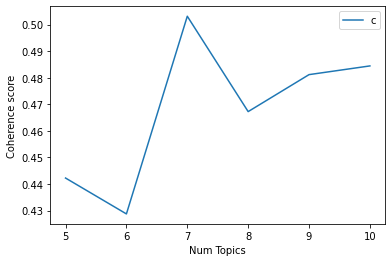

In [189]:
import matplotlib.pyplot as plt

Ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dct, iterations=50)
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dct, corpus=corpus, texts=dataset, start=5, limit=11, step=1)
limit=11; start=5; step=1;

#토픽의 개수를 3~5개로 제한하여 Coherence score, Perplexity score 값을 연속적으로 도출
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

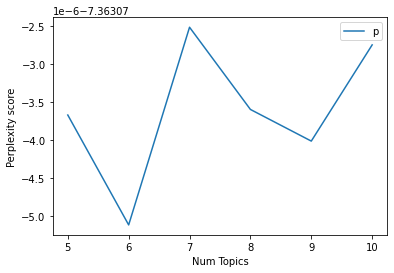

In [190]:
x = range(start, limit, step)

plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [193]:
model_list

In [194]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
ldamodel = model_list[5] #Coherence score 값이 가장 크고, Perplexity score 값이 가장 작은 점
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dct, sort_topics=False)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, '/content/drive/MyDrive/프로젝트/Topic.html')
topics = ldamodel.print_topics()
for topic in topics:

    print(topic)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


(0, '0.035*"서비스" + 0.019*"국민" + 0.016*"크롬북" + 0.013*"시장" + 0.012*"전자" + 0.011*"업무" + 0.011*"협약" + 0.010*"교육" + 0.010*"비서" + 0.009*"증명서"')
(1, '0.027*"금융" + 0.017*"결제" + 0.011*"법" + 0.010*"데이터" + 0.010*"페이" + 0.009*"허가" + 0.009*"금융위" + 0.008*"은행" + 0.008*"마이" + 0.008*"테크"')
(2, '0.022*"뉴스" + 0.016*"알고리즘" + 0.013*"서비스" + 0.012*"이용자" + 0.012*"검토" + 0.011*"라인" + 0.010*"위원회" + 0.010*"정보" + 0.009*"데이터" + 0.008*"위"')
(3, '0.023*"서비스" + 0.013*"클라우드" + 0.009*"기업" + 0.009*"플랫폼" + 0.007*"지원" + 0.007*"통해" + 0.007*"기술" + 0.006*"구축" + 0.006*"및" + 0.006*"활용"')
(4, '0.026*"지난해" + 0.022*"매출" + 0.017*"대비" + 0.015*"투자" + 0.014*"기업" + 0.013*"사업" + 0.013*"성장" + 0.012*"기록" + 0.011*"년" + 0.011*"증가"')
(5, '0.036*"라이브" + 0.018*"쇼핑" + 0.018*"구매" + 0.015*"방송" + 0.012*"진행" + 0.011*"혜택" + 0.010*"통해" + 0.009*"제공" + 0.009*"고객" + 0.008*"중"')
(6, '0.049*"신세계" + 0.019*"이마트" + 0.018*"그룹" + 0.017*"교환" + 0.015*"대표" + 0.014*"쿠팡" + 0.013*"물류" + 0.012*"날" + 0.011*"오프라인" + 0.010*"서비스"')
(7, '0.012*"교육" + 0.012*"서비스" + 0.012*"

In [183]:
from collections import Counter

In [184]:
Noun_words=[]
for i in range(len(t_df)):
    for j in range(len(t_df['Nouns_'][i])):
        Noun_words.append(t_df['Nouns_'][i][j])

In [186]:
c = Counter(Noun_words)
print(c.most_common(10)) # 상위 10개 출력하기

[('서비스', 5019), ('플랫폼', 2794), ('통해', 2530), ('위', 2288), ('글로벌', 2161), ('사업', 2158), ('대표', 2020), ('라이브', 1997), ('제공', 1974), ('콘텐츠', 1903)]


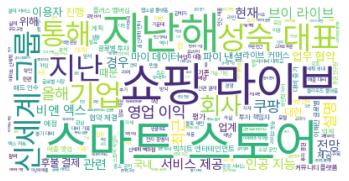

In [188]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = '/content/drive/MyDrive/프로젝트/Pretendard-Regular.ttf' # For Korean characters

noun_text = ''
for word in Noun_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=60,  background_color='white', relative_scaling=.5, font_path=FONT_PATH).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [195]:
topics

[(0,
  '0.035*"서비스" + 0.019*"국민" + 0.016*"크롬북" + 0.013*"시장" + 0.012*"전자" + 0.011*"업무" + 0.011*"협약" + 0.010*"교육" + 0.010*"비서" + 0.009*"증명서"'),
 (1,
  '0.027*"금융" + 0.017*"결제" + 0.011*"법" + 0.010*"데이터" + 0.010*"페이" + 0.009*"허가" + 0.009*"금융위" + 0.008*"은행" + 0.008*"마이" + 0.008*"테크"'),
 (2,
  '0.022*"뉴스" + 0.016*"알고리즘" + 0.013*"서비스" + 0.012*"이용자" + 0.012*"검토" + 0.011*"라인" + 0.010*"위원회" + 0.010*"정보" + 0.009*"데이터" + 0.008*"위"'),
 (3,
  '0.023*"서비스" + 0.013*"클라우드" + 0.009*"기업" + 0.009*"플랫폼" + 0.007*"지원" + 0.007*"통해" + 0.007*"기술" + 0.006*"구축" + 0.006*"및" + 0.006*"활용"'),
 (4,
  '0.026*"지난해" + 0.022*"매출" + 0.017*"대비" + 0.015*"투자" + 0.014*"기업" + 0.013*"사업" + 0.013*"성장" + 0.012*"기록" + 0.011*"년" + 0.011*"증가"'),
 (5,
  '0.036*"라이브" + 0.018*"쇼핑" + 0.018*"구매" + 0.015*"방송" + 0.012*"진행" + 0.011*"혜택" + 0.010*"통해" + 0.009*"제공" + 0.009*"고객" + 0.008*"중"'),
 (6,
  '0.049*"신세계" + 0.019*"이마트" + 0.018*"그룹" + 0.017*"교환" + 0.015*"대표" + 0.014*"쿠팡" + 0.013*"물류" + 0.012*"날" + 0.011*"오프라인" + 0.010*"서비스"'),
 (7,
  '0.0

In [197]:
from node2vec import Node2Vec

In [198]:
import networkx as nx

In [201]:
import mlxtend
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
import time
import tqdm
import math
from collections import Counter

In [202]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# 연관규칙 분석

In [203]:
t_df

title         date  \
0       네이버·카카오로도 기차 예매한다…통합 교통 정보 제공(종합)  2021.01.31.   
1     2월부터 ‘네이버’·‘카카오T’ 앱에서 KTX 승차권 바로 예약  2021.01.31.   
2             네이버 지도, 기차예매부터 맛집 검색까지 다 된다  2021.01.31.   
3         [시그널] 네이버, 국내외서 1조 이상 투자자금 조달한다  2021.01.31.   
4           네이버, 벌어들인 돈보다 R&D 투자에 더 쓴다…왜?  2021.01.31.   
...                                   ...          ...   
2079    네이버와 손잡은 LG전자, '웨일북'으로 크롬북 시장 흔들까  2021.03.26.   
2080                 네이버·엔씨 평균 연봉 1억원 넘었다  2021.03.17.   
2081          신세계-네이버 동맹 현실화…오후 이사회 열고 확정  2021.03.16.   
2082               네이버-신세계-CJ '反쿠팡 동맹' 떴다  2021.03.16.   
2083   논란의 '네이버 뉴스' 알고리즘, 외부 위원회 구성해 따져본다  2021.03.17.   

                                                content  Cluster_label  \
0     네이버와 카카오모빌리티는 오는 1일부터 한국철도공사 기차 예매 서비스를 제공한다고 ...              1   
1     ‘코레일톡’ 없어도, 철도회원 가입 안해도 예약 가능…비대면 서비스 강화 한국철도는...              1   
2     한국철도공사 기차 운행 정보 제공...지역 정보 유용네이버는 2월1일부터 '네이버 ...              1   
3     회사채 발행 계획 본격화...1분기 내 1조원 넘는 현금 쥘 듯대규모 실탄 마련해 ...              1   
4     중소상공인 디지털 전환 앞장…지난해 매출 대비 R&D 투자 비율 25% 네이버가 지...              1   
...                                                 ...            ...   
2079  이르면 하반기께 웨일북 출시…크롬북 대비 콘텐츠 등 경쟁력 확보 관건장익환 LG전자...              1   
2080  작년 각각 1억248만·1억550만원창업자들 연봉도 역대급 기록이해진 19억·김택진...              1   
2081  네이버와 이마트가 동맹을 현실화한다. 신세계그룹과 네이버는 16일 오후 각각 이사회...              1   
2082  3개사 잇달아 지분 맞교환이베이 입찰에 대기업 다수 참여◆ 쿠팡發 유통빅뱅 ④ ◆온...              1   
2083  윤영찬 더불어민주당 의원이 포털 ‘다음’ 메인에 실린 국민의힘 주호영 원내대표의 교...              1   

                                                  Nouns  \
0     [네이버, 카카오, 모빌리티, 한국, 철도공사, 기차, 예매, 서비스, 제공, 고,...   
1     [코레일, 톡, 철도, 회원, 가입, 안해, 예약, 가능, 비대, 서비스, 강화, ...   
2     [한국, 철도공사, 기차, 운행, 정보, 제공, 지역, 정보, 유용, 네이버, 네이...   
3     [회사채, 발행, 계획, 본격, 내, 현금, 듯, 대규모, 실탄, 마련, 글로벌, ...   
4     [중소, 공인, 디지털, 전환, 앞장, 지난해, 매출, 대비, 투자, 비율, 네이버...   
...                                                 ...   
2079  [하반기, 웨일, 북, 출시, 크롬북, 대비, 콘텐츠, 등, 경쟁력, 확보, 관건,...   
2080  [작년, 각각, 연봉, 역대, 기록, 이해진, 김택진, 비교, 각, 네이버, 창업,...   
2081  [네이버, 이마트, 동맹, 현실, 신세계, 그룹, 네이버, 오후, 각각, 이사회, ...   
2082  [개사, 달, 분, 교환, 이베이, 입찰, 대기업, 다수, 참여, 쿠팡, 유통, 빅...   
2083  [윤영, 찬, 민주당, 의원, 포털, 다음, 메인, 국민, 힘, 주호영, 원내대표,...   

                                                 Nouns_  
0     [모빌리티, 한국, 철도공사, 기차, 예매, 서비스, 제공, 지도, 애플리케이션, ...  
1     [코레일, 철도, 회원, 가입, 안해, 예약, 가능, 비대, 서비스, 강화, 한국,...  
2     [한국, 철도공사, 기차, 운행, 정보, 제공, 지역, 정보, 유용, 지도, 앱, ...  
3     [회사채, 발행, 계획, 본격, 현금, 대규모, 실탄, 마련, 글로벌, 시장, 정,...  
4     [중소, 공인, 디지털, 전환, 앞장, 지난해, 매출, 대비, 투자, 비율, 지난해...  
...                                                 ...  
2079  [하반기, 출시, 크롬북, 대비, 콘텐츠, 경쟁력, 확보, 관건, 장익, 환, 전자...  
2080  [작년, 연봉, 역대, 기록, 이해진, 김택진, 비교, 창업, 이해진, 글로벌, 책...  
2081  [이마트, 동맹, 현실, 신세계, 그룹, 오후, 이사회, 교환, 협약, 관련, 사안...  
2082  [개사, 교환, 이베이, 입찰, 대기업, 다수, 참여, 쿠팡, 유통, 빅뱅, 온라인...  
2083  [윤영, 민주당, 의원, 포털, 다음, 메인, 국민, 힘, 주호영, 원내대표, 교섭...  

[2084 rows x 6 columns]

In [204]:
dataset = []
for i in range(len(t_df)):
    dataset.append(t_df.Nouns_[i])

In [205]:
te = TransactionEncoder()
te_result = te.fit(dataset).transform(dataset)

In [206]:
te_df = pd.DataFrame(te_result, columns=te.columns_)
te_df

가가     가감     가게     가격     가계     가곡     가공     가교     가구     가기  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False   True  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2079  False  False  False   True  False  False  False  False  False  False   
2080  False  False  False  False  False  False  False  False  False  False   
2081  False  False  False  False  False  False  False  False  False  False   
2082  False  False  False  False  False  False  False  False  False  False   
2083  False  False  False  False  False  False  False  False  False  False   

      ...  히알루론산    히어로     히트      힌      힐    힐러리     힐링      힘   힘겨루기  \
0     ...  False  False  False  False  False  False  False  False  False   
1     ...  False  False  False  False  False  False  False  False  False   
2     ...  False  False  False  False  False  False  False  False  False   
3     ...  False  False  False  False  False  False  False  False  False   
4     ...  False  False  False  False  False  False  False  False  False   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2079  ...  False  False  False  False  False  False  False  False  False   
2080  ...  False  False  False  False  False  False  False  False  False   
2081  ...  False  False  False  False  False  False  False  False  False   
2082  ...  False  False  False  False  False  False  False  False  False   
2083  ...  False  False  False  False  False  False  False   True  False   

        힙입어  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
2079  False  
2080  False  
2081  False  
2082  False  
2083  False  

[2084 rows x 10450 columns]

In [207]:
itemset = apriori(te_df, use_colnames=True)
itemset

support itemsets
0  0.710653     (기자)
1  0.534549      (말)
2  0.580134    (서비스)
3  0.587332     (통해)

In [208]:
itemset = apriori(te_df, min_support=0.1, use_colnames=True)
itemset

support                itemsets
0     0.121881                   (가능성)
1     0.134357                   (가운데)
2     0.154031                    (가장)
3     0.158349                    (가치)
4     0.108445                     (간)
...        ...                     ...
4410  0.103647     (통해, 말, 위, 서비스, 사업)
4411  0.105566   (통해, 플랫폼, 말, 서비스, 사업)
4412  0.112764   (통해, 플랫폼, 위, 서비스, 사업)
4413  0.109885    (확대, 통해, 위, 서비스, 사업)
4414  0.104607  (확대, 통해, 플랫폼, 서비스, 사업)

[4415 rows x 2 columns]

In [212]:
from mlxtend.frequent_patterns import association_rules
association_rules(itemset, metric="confidence", min_threshold=0.7) 

antecedents consequents  antecedent support  consequent support  \
0                   (가치)        (기자)            0.158349            0.710653   
1                   (강화)        (기자)            0.169386            0.710653   
2                   (강화)        (사업)            0.169386            0.418906   
3                   (강화)        (통해)            0.169386            0.587332   
4                    (개)        (기자)            0.261036            0.710653   
...                  ...         ...                 ...                 ...   
3184    (사업, 위, 통해, 서비스)        (확대)            0.150672            0.369482   
3185  (확대, 플랫폼, 통해, 서비스)        (사업)            0.122361            0.418906   
3186   (확대, 플랫폼, 통해, 사업)       (서비스)            0.123321            0.580134   
3187   (확대, 사업, 통해, 서비스)       (플랫폼)            0.135797            0.408349   
3188  (확대, 사업, 플랫폼, 서비스)        (통해)            0.128599            0.587332   

       support  confidence      lift  leverage  conviction  
0     0.116123    0.733333  1.031915  0.003591    1.085053  
1     0.121401    0.716714  1.008529  0.001027    1.021396  
2     0.119482    0.705382  1.683868  0.048525    1.972367  
3     0.126679    0.747875  1.273343  0.027194    1.636762  
4     0.183301    0.702206  0.988114 -0.002205    0.971636  
...        ...         ...       ...       ...         ...  
3184  0.109885    0.729299  1.973844  0.054214    2.329209  
3185  0.104607    0.854902  2.040797  0.053349    4.004837  
3186  0.104607    0.848249  1.462160  0.033064    2.766807  
3187  0.104607    0.770318  1.886419  0.049154    2.575956  
3188  0.104607    0.813433  1.384962  0.029076    2.211900  

[3189 rows x 9 columns]